In [1]:
from lcode2dPy.simulation.interface import Simulation
from lcode2dPy.diagnostics.targets import BeamDiagnostics
from lcode2dPy.config.default_config import default_config
from lcode2dPy.beam_generator.beam_generator import make_beam, Gauss, rGauss
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
# Config
config = default_config
config.set('time-step', 1000)
config.set('time-limit', 20000.5)
config.set('window-length', 15)
config.set('window-width', 3)
config.set('r-step', 0.05)
config.set('xi-step', 0.05)

# Beam
gamma = 426
angspread = 1e-5
m_proton = 958/0.51

beam_pars = dict(xi_distr=Gauss(sigma=100, vmin=-config.getfloat('window-length'), vmax=0),
                r_distr=rGauss(vmin=0, vmax=config.getfloat('window-width')),
                ang_distr=Gauss(sigma=angspread, vmin=None, vmax=None),
                pz_distr=Gauss(gamma*m_proton, gamma*m_proton*1e-4, vmin=None, vmax=None),
                Ipeak_kA=2*40/1000,
                q_m=1/m_proton,
                saveto=None)

# Diagnostics
diagnostics = [
    BeamDiagnostics(config=config, period=20000)
]

sim = Simulation(beam_pars=beam_pars, diagnostics=diagnostics, config=config)

In [3]:
sim.step(int(config.getfloat('time-limit') // config.getfloat('time-step')))

Number of particles: 119551
Number of particles in the middle layer: 200


In [17]:
time_limit = config.getfloat('time-limit')
time_step = config.getfloat('time-step')
t = list(data.keys())[-1]
beam = diagnostics[0].data[t]

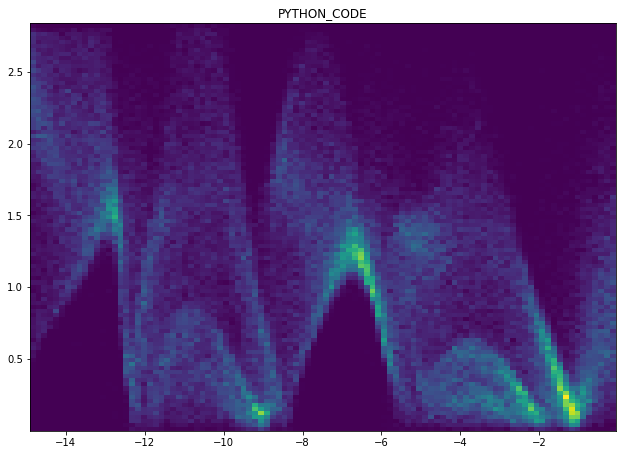

In [18]:
bins = 100
py_hist = plt.hist2d(beam['xi'], beam['r'], bins=bins)[0]
plt.title('PYTHON_CODE')

fig = plt.gcf()
fig.set_size_inches(10.5, 7.5)
plt.plot();